##  Predicting Employee Attrition Using Machine Learning

## Data Description 
The dataset consists of 25491 obseravtions and 10 variables. Each row in dataset represents an employee; each column contains employee attributes:

* satisfaction_level (0–1)
* last_evaluation (Time since last evaluation in years)
* number_projects (Number of projects completed while at work)
* average_monthly_hours (Average monthly hours at workplace)
* time_spend_company (Time spent at the company in years)
* Work_accident (Whether the employee had a workplace accident)
* left (Whether the employee left the workplace or not (1 or 0))
* promotion_last_5years (Whether the employee was promoted in the last five years)
* sales (Department in which they work for)
* salary (Relative level of salary)



### Step 1 : Data Import and Preprocessing

In [1]:
#Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
hr = pd.read_csv('HR_comma_sep.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
#Rename 'sales' column to department 
hr=hr.rename(columns = {'sales':'department'})
#Display data type for each column
hr.dtypes


satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [4]:
#Check for Missing Values
hr.isnull().any()


satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
department               False
salary                   False
dtype: bool

The “left” column is the outcome variable recording 1 and 0. 1 for employees who left the company and 0 for those who didn’t.

In [5]:
#Dimensions of our dataset
hr.shape


(14999, 10)

In [6]:
#Summary for each variable
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


The department column of the dataset has many categories and we need to reduce the categories for a better modeling. The department column has the following categories:

In [7]:
#To get the unique values for department
hr['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

Let us combine “technical”, “support” and “IT” these three together and call them “technical”.

In [8]:
#Combine "technical","support" and "IT" into one department
hr['department']=np.where(hr['department'] =='support', 'technical', hr['department'])
hr['department']=np.where(hr['department'] =='IT', 'technical', hr['department'])

After the change, this is how the department categories look:

In [9]:
#Print the updated values of departments
print(hr['department'].unique())


['sales' 'accounting' 'hr' 'technical' 'management' 'product_mng'
 'marketing' 'RandD']


# Data Exploration

Let us find out the number of employees who left the company and those who didn’t:

In [10]:
hr['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

We observe that 5990 employees left the company, which is 23.4 per cent of the total employees in the organisation.

In [11]:
hr.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Several observations:
* The average satisfaction level of employees who stayed with the company is higher than that of the employees who left.
* The average monthly work hours of employees who left the company is more than that of the employees who stayed.
* The employees who had workplace accidents are less likely to leave than that of the employee who did not have workplace accidents.
* The employees who were promoted in the last five years are less likely to leave than those who did not get a promotion in the last five years.

We can calculate categorical means for categorical variables such as department and salary to get a more detailed sense of our data like so:

In [12]:
hr.groupby('department').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
department,,,,,,,,
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155
technical,0.613687,0.720976,3.839054,201.813795,3.416127,0.144106,0.246924,0.008258


In [13]:
hr.groupby('salary').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
salary,,,,,,,,
high,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.066289,0.058205
low,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.296884,0.009021
medium,0.621817,0.717322,3.813528,201.338349,3.529010,0.145361,0.204313,0.028079


## Data Visualization

Let us visualize our data to get a much clearer picture of the data and the significant features.

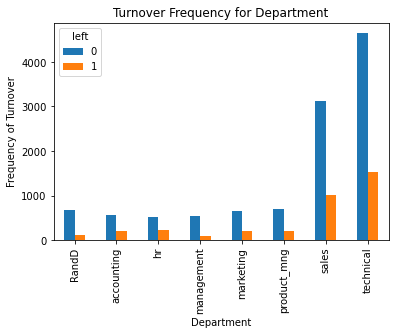

In [14]:
%matplotlib inline

#Bar chart for department employee work for and the frequency of turnover
pd.crosstab(hr.department,hr.left).plot(kind='bar')
plt.title('Turnover Frequency for Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
plt.savefig('department_bar_chart')

It is evident that the frequency of employee turnover depends a great deal on the department they work for. Thus, department can be a good predictor of the outcome variable.

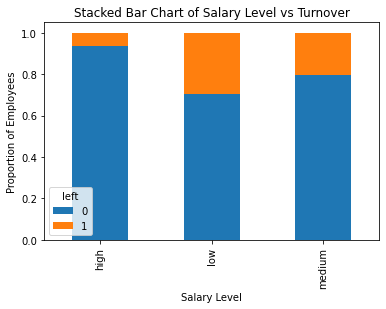

In [15]:
#Bar chart for employee salary level and the frequency of turnover
table=pd.crosstab(hr.salary, hr.left)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart')

The proportion of the employee turnover depends a great deal on their salary level; hence, salary level can be a good predictor in predicting the outcome.

In [16]:
#Proportion of employees left by department
pd.crosstab(hr.department, hr.left)

left,0,1
department,,
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
technical,4651,1525


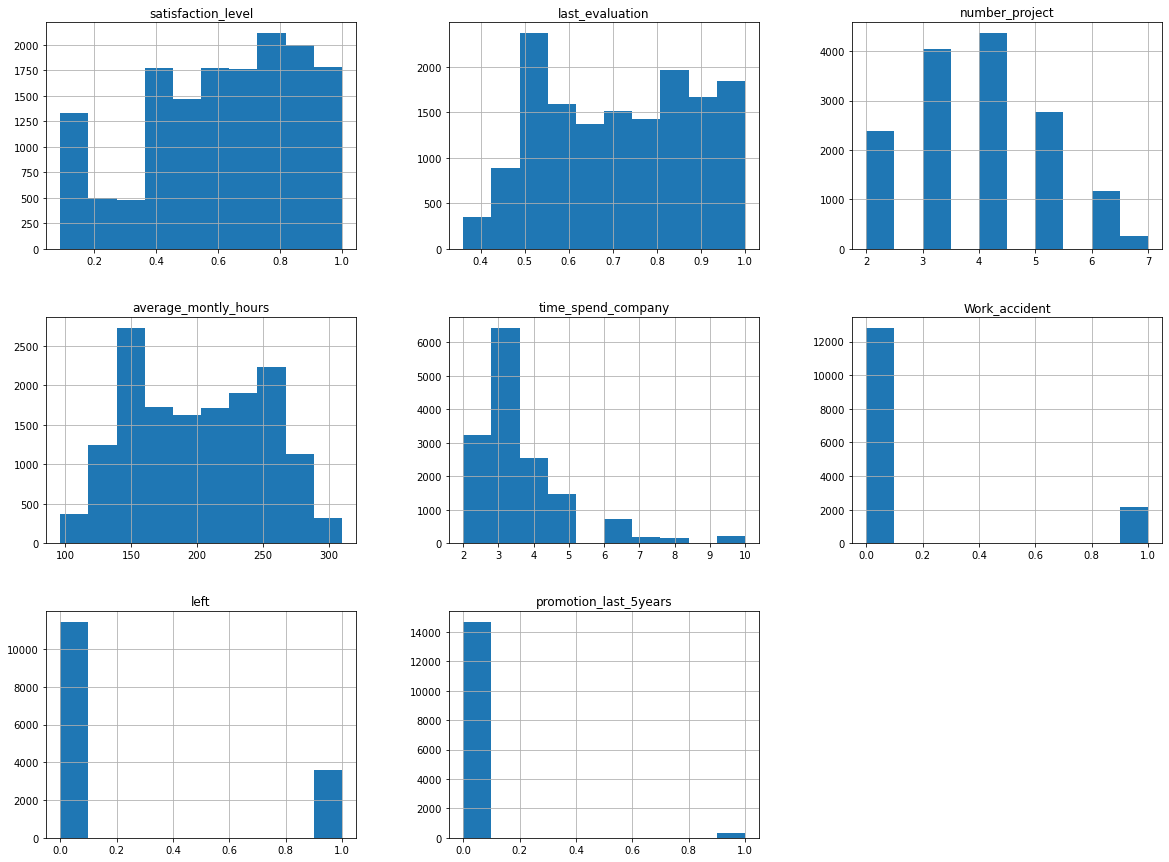

In [17]:
#Histogram of numeric variables
num_bins = 10

hr.hist(bins=num_bins, figsize=(20,15))
plt.savefig("hr_histogram_plots")
plt.show()

In [18]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Categorize the columns containing labels to perform label encoding.

In [19]:
catcols=set(hr.dtypes[hr.dtypes=='O'].index.values)
print(catcols)

{'department', 'salary'}


 Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form.

In [20]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter as c
x='*'
for i in catcols:
    print("LABEL ENCODING OF:",i)
    LE = LabelEncoder()
    print(c(hr[i]))
    #print(c(data[i]))
    hr[i] = LE.fit_transform(hr[i])
    #x_test_cat[i] = LEi.transform(x_test_cat[i])
    print(c(hr[i]))
    #print(c(x_test_cat[i]))
    print(x*100)

LABEL ENCODING OF: department
Counter({'technical': 6176, 'sales': 4140, 'product_mng': 902, 'marketing': 858, 'RandD': 787, 'accounting': 767, 'hr': 739, 'management': 630})
Counter({7: 6176, 6: 4140, 5: 902, 4: 858, 0: 787, 1: 767, 2: 739, 3: 630})
****************************************************************************************************
LABEL ENCODING OF: salary
Counter({'low': 7316, 'medium': 6446, 'high': 1237})
Counter({1: 7316, 2: 6446, 0: 1237})
****************************************************************************************************


In [21]:
for i in catcols:
    table = pd.crosstab(hr[i],hr.left)
    print(table)
    from scipy.stats import chi2_contingency
    from scipy.stats import chi2
    chisquare, p, dof, expected = chi2_contingency(table)
    print('dof: ', dof)
    print('chisquare: ', chisquare)
    print('p: ' , p)
    print("*"*110)

left           0     1
department            
0            666   121
1            563   204
2            524   215
3            539    91
4            655   203
5            704   198
6           3126  1014
7           4651  1525
dof:  7
chisquare:  81.43184416188933
p:  7.02990555909066e-15
**************************************************************************************************************
left       0     1
salary            
0       1155    82
1       5144  2172
2       5129  1317
dof:  2
chisquare:  381.22504706621066
p:  1.652086749295958e-83
**************************************************************************************************************


In [22]:
hr.columns.values

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'left', 'promotion_last_5years', 'department', 'salary'],
      dtype=object)

In [23]:
X= hr.drop(['left'],axis=1)
y = hr['left']
X.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [24]:
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,0,6,1
1,0.80,0.86,5,262,6,0,0,6,2
2,0.11,0.88,7,272,4,0,0,6,2
3,0.72,0.87,5,223,5,0,0,6,1
4,0.37,0.52,2,159,3,0,0,6,1
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,7,1
14995,0.37,0.48,2,160,3,0,0,7,1
14996,0.37,0.53,2,143,3,0,0,7,1
14997,0.11,0.96,6,280,4,0,0,7,1


In [25]:
#Split data into training and test samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scale=scaler.fit_transform(X_train)
import pickle
filename = 'scaler.pkl'
pickle.dump(scaler, open(filename, 'wb'))

In [27]:
X_scale

array([[0.48351648, 0.25      , 0.        , ..., 0.        , 1.        ,
        1.        ],
       [0.74725275, 0.265625  , 0.6       , ..., 0.        , 0.14285714,
        1.        ],
       [0.87912088, 0.671875  , 0.2       , ..., 0.        , 1.        ,
        1.        ],
       ...,
       [0.65934066, 0.90625   , 0.6       , ..., 0.        , 1.        ,
        1.        ],
       [0.75824176, 0.359375  , 0.6       , ..., 0.        , 1.        ,
        0.        ],
       [0.51648352, 0.5       , 0.6       , ..., 0.        , 1.        ,
        0.5       ]])

### Random Forest

In [28]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_scale, y_train)

RandomForestClassifier()

In [29]:
from sklearn.metrics import accuracy_score
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))

Random Forest Accuracy: 0.483


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


### 10 Fold Cross Validation

Cross validation attempts to avoid overfitting while still producing a prediction for each observation dataset. We are using 10-fold Cross-Validation to train our Random Forest.

In [30]:
#For Random Forest
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10)
modelCV = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_scale, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy for Random Forest Classifier: %.3f" % (results.mean()))

10-fold cross validation average accuracy for Random Forest Classifier: 0.990


### Precision and Recall

We construct confusion matrix to visualize predictions made by a classifier and evaluate the accuracy of a classification.

In [31]:
#Precison Recall Scores for Random Forest
from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.41      0.55      3462
           1       0.27      0.72      0.39      1038

    accuracy                           0.48      4500
   macro avg       0.55      0.57      0.47      4500
weighted avg       0.70      0.48      0.51      4500



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


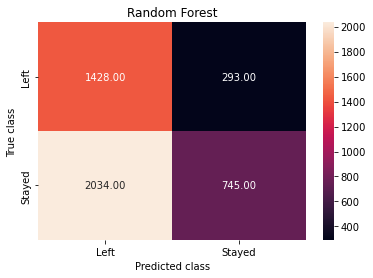

In [33]:
#Confusion Matrix for Random Forest
y_pred = rf.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
forest_cm = metrics.confusion_matrix(y_pred, y_test)
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left",
                                                                                               "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')

### Variable Imporatnce for Random Forest Classifier

According to our Random Forest model, the  the most important features which influence whether to leave the company, in ascending order are as follows:

In [34]:
feature_labels = np.array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'department', 'salary'])
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))


promotion_last_5years-0.13%
Work_accident-0.53%
salary-0.77%
department-0.98%
last_evaluation-13.49%
average_montly_hours-14.94%
number_project-17.74%
time_spend_company-18.14%
satisfaction_level-33.27%


## Results & Conclusion

Random Forest is the best classfier for predicting employee attrition for our dataset. Some of the most important factors on which employee attrition depends are 
* Satisfaction Level
* Tenure with organisation
* Time since last evaluation
* Work Accident
* Salary
* Department
* Career Advancement ( If Promoted in last five years or not)

In [35]:
filename = 'PAE_model.pkl'
pickle.dump(rf, open(filename, 'wb'))

In [36]:
X_train.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [37]:
X_train.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary
10438,0.53,0.52,2,135,4,0,0,7,2
9236,0.77,0.53,5,256,3,0,0,1,2
818,0.89,0.79,3,149,2,0,0,7,2
11503,0.64,0.63,3,156,6,1,0,7,1
11721,0.98,0.74,4,151,3,0,0,6,2


In [38]:
X_train.department

10438    7
9236     1
818      7
11503    7
11721    6
        ..
13123    0
3264     7
9845     7
10799    7
2732     7
Name: department, Length: 10499, dtype: int32

In [39]:
print(c(hr['department']))

Counter({7: 6176, 6: 4140, 5: 902, 4: 858, 0: 787, 1: 767, 2: 739, 3: 630})


In [40]:
name=rf.predict([[0.95,0.76,4,220,3,0,0,7,2]])

In [41]:
c(name)

Counter({0: 1})

LABEL ENCODING OF: salary
Counter({'low': 7316, 'medium': 6446, 'high': 1237})
Counter({1: 7316, 2: 6446, 0: 1237})
****************************************************************************************************
LABEL ENCODING OF: department
Counter({'technical': 6176, 'sales': 4140, 'product_mng': 902, 'marketing': 858, 'RandD': 787, 'accounting': 767, 'hr': 739, 'management': 630})
Counter({7: 6176, 6: 4140, 5: 902, 4: 858, 0: 787, 1: 767, 2: 739, 3: 630})
****************************************************************************************************